In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data_set=pd.read_csv("train.csv") #Mnist dataset
class_label=data_set.label #assign class label to a variable
new_data=data_set.drop(columns='label') #drop class label
new_data
class_label.shape

(42000,)

In [9]:
#Data Processing
from sklearn.preprocessing import StandardScaler
col_std=StandardScaler().fit_transform(new_data)

c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


7.390360324574467e-19

In [63]:
#Eigen Decomposition
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=2
trasnfrom_array=pca.fit_transform(col_std) #train my model
trasnfrom_array.shape

(42000, 2)

In [64]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[40.69647874 29.11146437]
[0.05747953 0.04111691]


In [34]:
#the class label is vertically stacked with eigenvectors 
new_cordinates=np.vstack((trasnfrom_array.T,class_label)).T 
new_cordinates.shape
dataframe=pd.DataFrame(data=new_cordinates,columns=['1st principal','2nd pricipal','label'])
dataframe

,1st principal,2nd pricipal,label
0,-5.140565,-5.225564,1.0
1,19.292346,6.032910,0.0
2,-7.644453,-1.706421,1.0
3,-0.474219,5.836324,4.0
4,26.559563,6.025064,0.0
5,1.269210,-0.713229,0.0
6,-6.139590,6.028139,7.0
7,0.147837,4.237910,3.0
8,-0.598147,-1.672040,5.0
9,2.940619,-2.182172,3.0


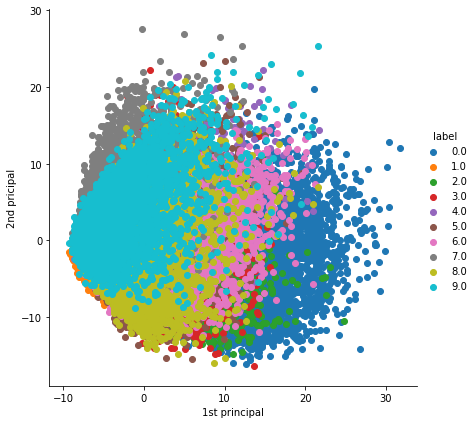

In [41]:
#visualize 
sns.FacetGrid(dataframe,hue='label',size=6)\
    .map(plt.scatter,'1st principal','2nd pricipal')\
    .add_legend()
plt.show()

In [73]:
pca.n_components=784
pca_data=pca.fit_transform(col_std) #EigenDecomose
percentage_varaince=pca.explained_variance_/np.sum(pca.explained_variance_)

cumsum_variance=np.cumsum(percentage_varaince)
cumsum_variance

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

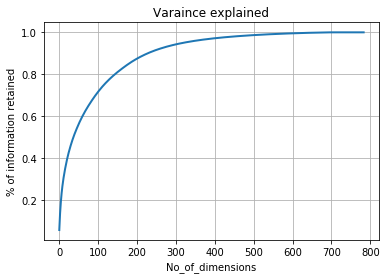

In [71]:
#plot  
plt.figure(1,figsize=(6,4))
plt.plot(cumsum_variance,linewidth=2)

plt.grid()
plt.xlabel('No_of_dimensions')
plt.ylabel('% of information retained')
plt.axis('tight')
plt.title('Varaince explained')
plt.show()